# Get to know millions of mobile device users


Nothing is more comforting than being greeted by your favorite drink just as you walk through the door of the corner café. While a thoughtful barista knows you take a macchiato every Wednesday morning at 8:15, it’s much more difficult in a digital space for your preferred brands to personalize your experience.

TalkingData, China’s largest third-party mobile data platform, understands that everyday choices and behaviors paint a picture of who we are and what we value. Currently, TalkingData is seeking to leverage behavioral data from more than 70% of the 500 million mobile devices active daily in China to help its clients better understand and interact with their audiences.

In this competition, Kagglers are challenged to build a model predicting users’ demographic characteristics based on their app usage, geolocation, and mobile device properties. Doing so will help millions of developers and brand advertisers around the world pursue data-driven marketing efforts which are relevant to their users and catered to their preferences.



In [145]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
from mpl_toolkits.basemap import Basemap
%matplotlib inline

## Read in the data

In [146]:
app_events_df = pd.read_csv('app_events.csv')
app_labels_df = pd.read_csv('app_labels.csv')
events_df = pd.read_csv('events.csv')
gender_age_train_df =  pd.read_csv('gender_age_train.csv')
label_categories_df = pd.read_csv('label_categories.csv')
phone_df = pd.read_csv('phone_brand_device_model.csv')


In [147]:
label_categories_df.head()

,label_id,category
0,1,NaN
1,2,game-game type
2,3,game-Game themes
3,4,game-Art Style
4,5,game-Leisure time


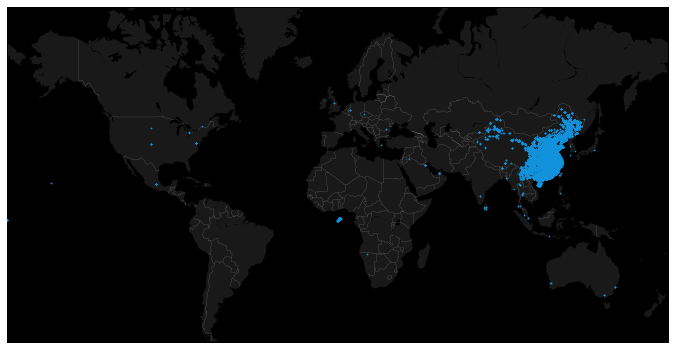

In [148]:
events_sample_df = events_df.sample(n = 100000) 
plt.figure(1, figsize=(12,6))
m1 = Basemap(projection='merc',
             llcrnrlat=-55,
             urcrnrlat=75,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')

m1.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

mxy = m1(events_sample_df["longitude"].tolist(),\
         events_sample_df["latitude"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="#1292db", lw=0, alpha=1, zorder=5)

Lots of events in China as expected but also in other regions
Focus on China to make sense of demographic info


## Subset China

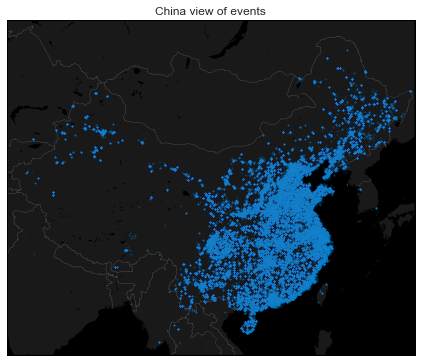

In [149]:
# Sample it down to only the China region
long_min, long_max = 73, 135
lat_min, lat_max = 15, 55

events_china_df = events_df[(events_df.longitude > long_min) &\
          (events_df.longitude < long_max) &\
         (events_df.latitude > lat_min) &\
         (events_df.latitude < lat_max)]
          
plt.figure(2, figsize=(12,6))
m2 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=long_min,
             urcrnrlon=long_max,
             lat_ts=35,
             resolution='i')

m2.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m2.drawmapboundary(fill_color='#000000')                # black background
m2.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

# Plot the data
mxy = m2(events_china_df["longitude"].tolist(), events_china_df["latitude"].tolist())
m2.scatter(mxy[0], mxy[1], s=5, c="#1292db", lw=0, alpha=0.05, zorder=5)

plt.title("China view of events")
plt.show()

## Focus on a Big city like Beijing

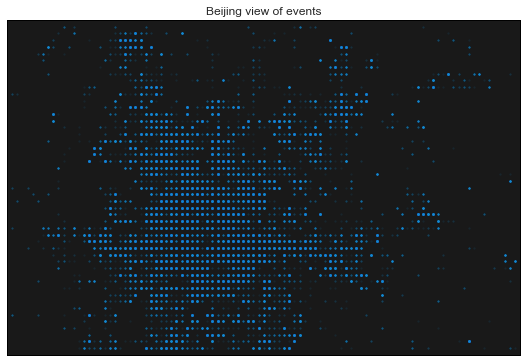

In [150]:
long_min, long_max = 116, 117
lat_min, lat_max = 39.75, 40.25

events_beijing_df = events_df[(events_df.longitude > long_min) &\
          (events_df.longitude < long_max) &\
         (events_df.latitude > lat_min) &\
         (events_df.latitude < lat_max)]

# Mercator of Beijing
plt.figure(3, figsize=(12,6))

m3 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=long_min,
             urcrnrlon=long_max,
             lat_ts=35,
             resolution='c')

m3.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m3.drawmapboundary(fill_color='#000000')                # black background
m3.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

# Plot the data
mxy = m3(events_beijing_df["longitude"].tolist(), events_beijing_df["latitude"].tolist())
m3.scatter(mxy[0], mxy[1], s=5, c="#1292db", lw=0, alpha=0.1, zorder=5)

plt.title("Beijing view of events")
plt.show()

## Figure out some features

In [151]:
events_beijing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119989 entries, 31 to 3252915
Data columns (total 5 columns):
event_id     119989 non-null int64
device_id    119989 non-null int64
timestamp    119989 non-null object
longitude    119989 non-null float64
latitude     119989 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 5.5+ MB


In [152]:
events_gender_df = pd.merge(events_beijing_df, gender_age_train_df,\
                            on = 'device_id' )
events_gender_df.head()
events_gender_df['timestamp'] = events_gender_df['timestamp'].astype('datetime64[ns]')

In [153]:
events_gender_df['day_of_week'] = events_gender_df['timestamp'].apply(lambda x: x.dayofweek)
events_gender_df['hour'] = events_gender_df['timestamp'].map(lambda x: x.hour)
events_gender_df.head()

,event_id,device_id,timestamp,longitude,latitude,gender,age,group,day_of_week,hour
0,32,1682568851428303645,2016-05-01 00:29:35,116.42,39.90,M,32,M32-38,6,0
1,18675,1682568851428303645,2016-05-02 17:29:18,116.42,39.90,M,32,M32-38,0,17
2,18676,1682568851428303645,2016-05-02 17:34:09,116.42,39.90,M,32,M32-38,0,17
3,155476,1682568851428303645,2016-05-02 17:33:14,116.42,39.90,M,32,M32-38,0,17
4,177580,1682568851428303645,2016-05-03 14:56:01,116.44,39.84,M,32,M32-38,1,14


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1d1727450>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1d1665390>]], dtype=object)

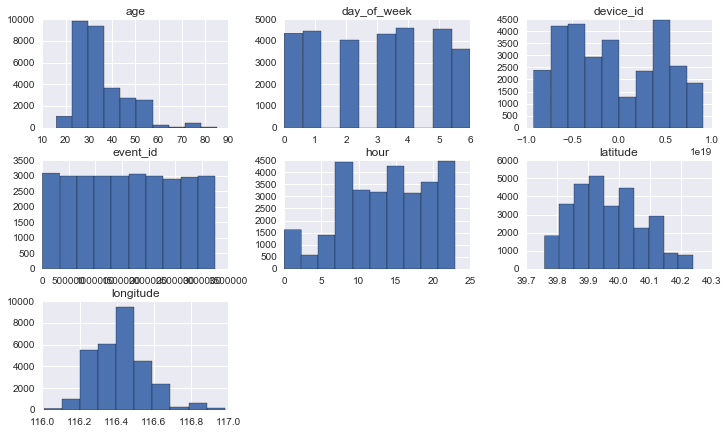

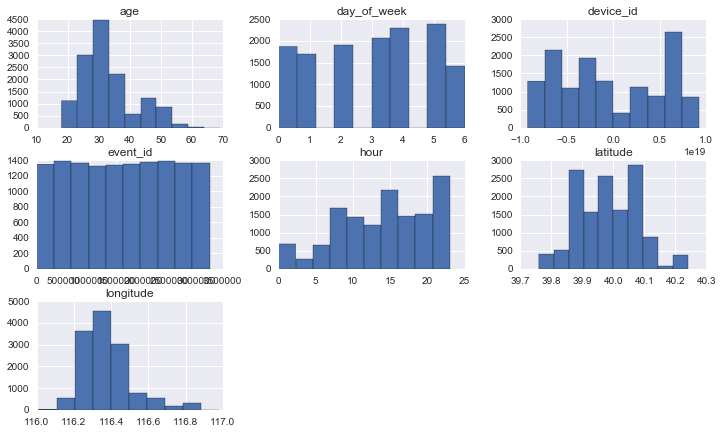

In [154]:
events_gender_df[events_gender_df.gender == 'M'].hist(figsize = (12,7))
events_gender_df[events_gender_df.gender == 'F'].hist(figsize = (12,7))

In [155]:
app_events_df.head()

,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1


In [156]:
np.min(events_gender_df['event_id'])

32

In [157]:
events_gender_df = pd.merge(events_gender_df, app_events_df, on = 'event_id')
app_labels_df = pd.merge(app_labels_df, label_categories_df, on = 'label_id')

In [158]:
events_gender_df = pd.merge(events_gender_df, app_labels_df, on = 'app_id' )

In [159]:
events_gender_df = pd.merge(events_gender_df, phone_df, on='device_id')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1d0c7b2d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x18c0f2210>]], dtype=object)

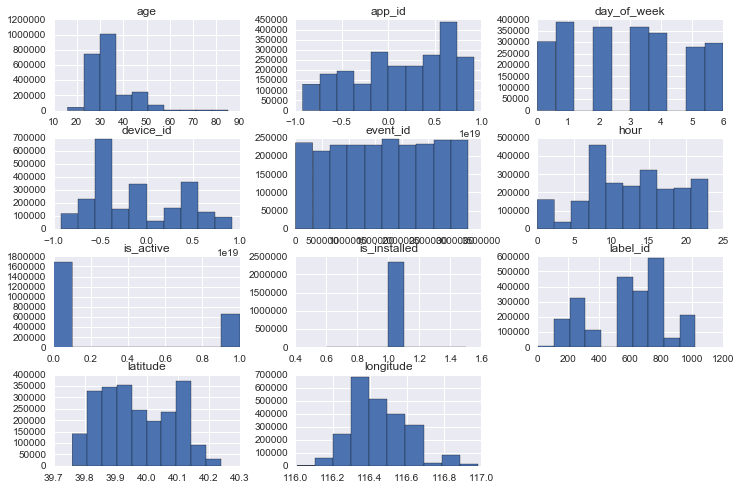

In [160]:
events_gender_df.hist(figsize = (12,8))

In [163]:
events_gender_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2338436 entries, 0 to 2338435
Data columns (total 17 columns):
event_id        int64
device_id       int64
timestamp       datetime64[ns]
longitude       float64
latitude        float64
gender          object
age             int64
group           object
day_of_week     int64
hour            int64
app_id          int64
is_installed    int64
is_active       int64
label_id        int64
category        object
phone_brand     object
device_model    object
dtypes: datetime64[ns](1), float64(2), int64(9), object(5)
memory usage: 321.1+ MB


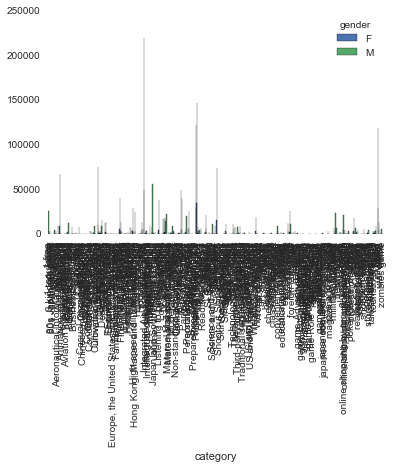

In [165]:
pd.crosstab([events_gender_df['category']], events_gender_df.gender).plot(kind='bar')

# visualize averages across beijing

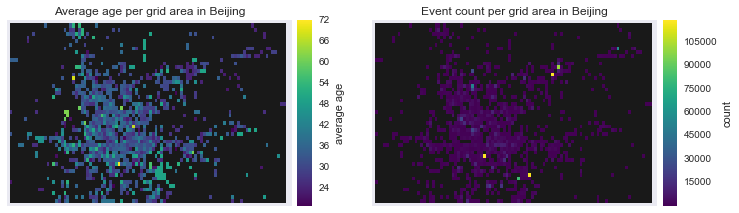

In [174]:
# Make a pivot table showing average age per area of a grid, also store the counts
events_gender_df["long_round"] = events_gender_df["longitude"].round(decimals=2)
events_gender_df["lat_round"] = events_gender_df["latitude"].round(decimals=2)

df_age = pd.pivot_table(events_gender_df,\
                        values="age",\
                        index="long_round",\
                        columns="lat_round",\
                        aggfunc=np.mean)

df_cnt = pd.pivot_table(events_gender_df,\
                        values="age",\
                        index="long_round",\
                        columns="lat_round",\
                        aggfunc="count")

# Age plot
plt.figure(5, figsize=(12,6))

# Plot avg age per grid
plt.subplot(121)
m5a = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=long_min,
             urcrnrlon=long_max,
             lat_ts=35,
             resolution='c')      
# Construct a heatmap
lons = df_age.index.values
lats = df_age.columns.values
x, y = np.meshgrid(lons, lats) 
px, py = m5a(x, y) 
data_values = df_age.values
masked_data = np.ma.masked_invalid(data_values.T)
cmap = plt.cm.viridis
cmap.set_bad(color="#191919")
# Plot the heatmap
m5a.pcolormesh(px, py, masked_data, cmap=cmap, zorder=5)
m5a.colorbar().set_label("average age")
plt.title("Average age per grid area in Beijing")

# Plot count per grid
plt.subplot(122)
m5b = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=long_min,
             urcrnrlon=long_max,
             lat_ts=35,
             resolution='c')      
# Construct a heatmap 
data_values = df_cnt.values
masked_data = np.ma.masked_invalid(data_values.T)
cmap = plt.cm.viridis
cmap.set_bad(color="#191919")
# Plot the heatmap
m5b.pcolormesh(px, py, masked_data, cmap=cmap, zorder=5)
m5b.colorbar().set_label("count")
plt.title("Event count per grid area in Beijing")

plt.show()

In [169]:
events_gender_df.head()

,event_id,device_id,timestamp,longitude,latitude,gender,age,group,day_of_week,hour,app_id,is_installed,is_active,label_id,category,phone_brand,device_model,long_round,lat_round
0,282359,1682568851428303645,2016-05-05 15:39:18,116.31,39.88,M,32,M32-38,3,15,1346581380304309068,1,1,209,pictures photography,三星,Galaxy J5,116.31,39.88
1,326293,1682568851428303645,2016-05-04 01:41:15,116.44,39.84,M,32,M32-38,2,1,1346581380304309068,1,1,209,pictures photography,三星,Galaxy J5,116.44,39.84
2,396446,1682568851428303645,2016-05-02 21:17:57,116.42,39.90,M,32,M32-38,0,21,1346581380304309068,1,1,209,pictures photography,三星,Galaxy J5,116.42,39.90
3,450617,1682568851428303645,2016-05-03 12:44:17,116.42,39.90,M,32,M32-38,1,12,1346581380304309068,1,1,209,pictures photography,三星,Galaxy J5,116.42,39.90
4,621032,1682568851428303645,2016-05-06 04:59:06,116.31,39.88,M,32,M32-38,4,4,1346581380304309068,1,1,209,pictures photography,三星,Galaxy J5,116.31,39.88


In [181]:
events_gender_df.head()

,event_id,device_id,timestamp,longitude,latitude,gender,age,group,day_of_week,hour,app_id,is_installed,is_active,label_id,category,phone_brand,device_model,long_round,lat_round
0,282359,1682568851428303645,2016-05-05 15:39:18,116.31,39.88,M,32,M32-38,3,15,1346581380304309068,1,1,209,pictures photography,三星,Galaxy J5,116.31,39.88
1,326293,1682568851428303645,2016-05-04 01:41:15,116.44,39.84,M,32,M32-38,2,1,1346581380304309068,1,1,209,pictures photography,三星,Galaxy J5,116.44,39.84
2,396446,1682568851428303645,2016-05-02 21:17:57,116.42,39.90,M,32,M32-38,0,21,1346581380304309068,1,1,209,pictures photography,三星,Galaxy J5,116.42,39.90
3,450617,1682568851428303645,2016-05-03 12:44:17,116.42,39.90,M,32,M32-38,1,12,1346581380304309068,1,1,209,pictures photography,三星,Galaxy J5,116.42,39.90
4,621032,1682568851428303645,2016-05-06 04:59:06,116.31,39.88,M,32,M32-38,4,4,1346581380304309068,1,1,209,pictures photography,三星,Galaxy J5,116.31,39.88


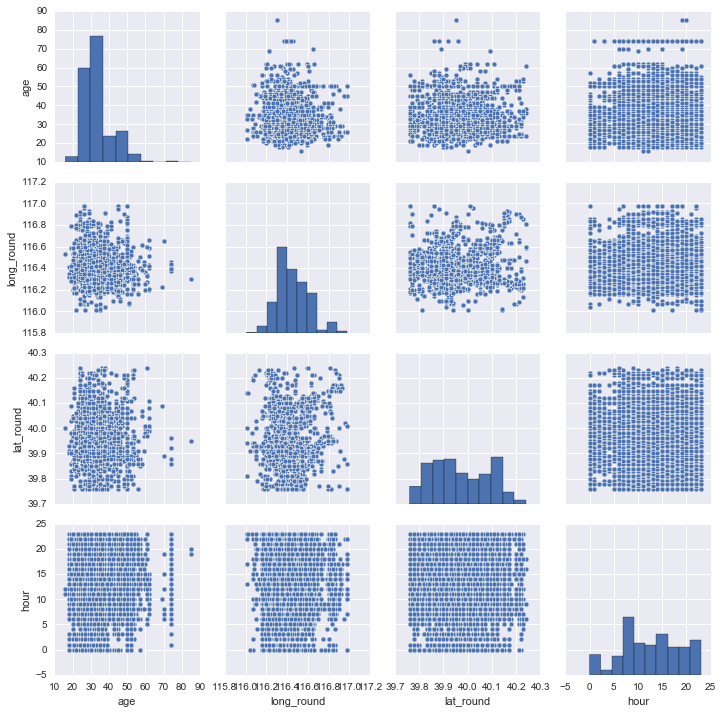

In [186]:
sns.pairplot(events_gender_df[['age', 'long_round', 'lat_round', 'hour']])

## Condense to important features

Create features defining poputlation, age range

In [189]:
# population
events_gender_df[['device_id', 'lat_round', 'long_round']].groupby(['lat_round', 'long_round']).count()

device_id
lat_round long_round           
39.76     116.17            899
          116.18            431
          116.20            580
          116.21           1303
          116.30           1210
          116.31           1206
          116.33          12138
          116.34            141
          116.35            141
          116.36            423
          116.37            141
          116.40            967
          116.44           2593
          116.45            378
          116.49            814
          116.50            631
          116.51           5859
          116.52            708
          116.54            149
          116.55            414
          116.79            273
          116.82             50
          116.98             57
39.77     116.18            110
          116.20            231
          116.21            979
          116.24            141
          116.26            284
          116.29             13
          116.30             13
...                         ...
40.21     116.09            176
          116.21            180
          116.22            149
          116.23            203
          116.24           1672
          116.25           1292
          116.26             67
          116.28           1019
          116.50            346
          116.64            316
          116.66            123
          116.90           2716
40.22     116.20             73
          116.22           1950
          116.23           6985
          116.25            228
          116.26            365
          116.37             96
          116.39            117
          116.87           1362
40.23     116.13              5
          116.22            222
          116.23             32
          116.25            579
          116.31            586
          116.86            454
40.24     116.47             36
          116.59             10
          116.60             53
          116.81            453

[1048 rows x 1 columns]